In [34]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.29M/6.29M [00:01<00:00, 6.51MB/s]


In [36]:
# Visit data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [37]:
# Scrape page into Pandas DataFrame
html = browser.html
df = pd.read_html(html)
mars_df = df[0]

mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [48]:
# Close the browser
browser.quit()

In [38]:
# Check data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [39]:
# Convert data types
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [40]:
# How many months exist on Mars?
len(mars_df["month"].unique())

12

12 months exist on Mars.

In [41]:
# How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
len(mars_df["sol"].unique())

1867

1867 Martian days' worth of data exist in the scraped dataset.

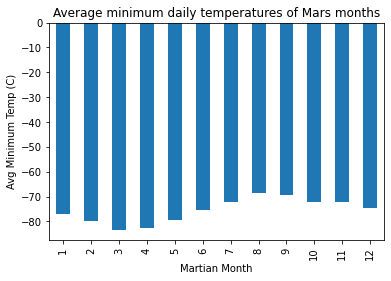

In [42]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
avg_temps = mars_df.groupby(["month"])["min_temp"].mean()
avg_temps.plot.bar(title='Average minimum daily temperatures of Mars months')
plt.xlabel('Martian Month')
plt.ylabel('Avg Minimum Temp (C)')
plt.show()

From the above figure, it appears that the third month is, on average, the coldest and the eighth month is the warmest.

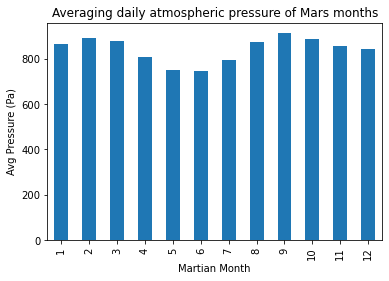

In [43]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
avg_pressures = mars_df.groupby(["month"])["pressure"].mean()
avg_pressures.plot.bar(title='Averaging daily atmospheric pressure of Mars months')
plt.xlabel("Martian Month")
plt.ylabel("Avg Pressure (Pa)")

plt.show()

From the above figure, it appears that the sixth month has the lowest average atmospheric pressure, while the ninth month has the highest.

2021 terrestrial (Earth) days exist in the dataset. This equates to 5.54 terrestrial years.


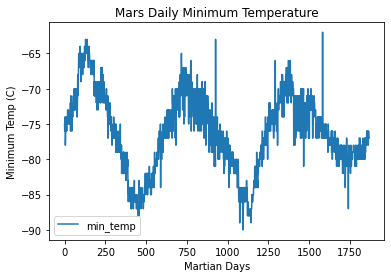

In [44]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
first_earth_date = mars_df['terrestrial_date'].min()
last_earth_date = mars_df['terrestrial_date'].max()
terrestrial_days = (last_earth_date - first_earth_date).days
print(f"{terrestrial_days} terrestrial (Earth) days exist in the dataset. This equates to {round(terrestrial_days/365, 2)} terrestrial years.")

temp_df = mars_df[['min_temp']]
temp_df.plot(title="Mars Daily Minimum Temperature")
plt.ylabel('Minimum Temp (C)')
plt.xlabel('Martian Days')

plt.show()

In [45]:
# Number of terrestrial (Earth) days in a Martian year (approx. 3 Martian years in above figure)
print(terrestrial_days/3)

673.6666666666666


From the above figure, it appears that there is roughly 3 Martian years of data (maybe slightly under 3).
Using this, we can estimate there to be approximately 673.7 terrestrial days in a Martian year.

In [47]:
# Export DataFrame to .csv
mars_df.to_csv("Outputs/mars_data.csv", index=False, header=True)